<a href="https://colab.research.google.com/github/nehaal10/Sentiment-Analysis/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#!pip install wordcloud
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Dataset/Twitter Sentiments.csv',encoding='latin-1')

In [ ]:
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


# **Text Preprocessing**

for text preprocessing we first filter out the unneccesary characters from the text. Then we detect what all languages are used in text,then we remove languages other than english. next step is tokenization here we append each word to a list. then we remove stop words. Then we do stemming .

AFTER THESE WE CAN SAY OUR DATA PREPROCESSED

In [ ]:
# regex
for i in range(len(data)):
  txt=data.loc[i]['tweet']
  if 'Ã' in txt:
    data.drop(i,inplace=True)
  else:
    txt=re.sub(r'@[a-zA-Z]+','',txt)
    txt=re.sub(r'[^\w\s]','',txt)
    data.at[i,'tweet']=txt

In [ ]:
ind=list(data.index)

In [ ]:
# tokenizing and removing stop words 
for i in ind:
  txt=data.loc[i]['tweet']
  words=nltk.word_tokenize(txt) # tokenization
  words=[i for i in words if i not in stopwords.words('english') ] #removing stopwords
  data.at[i,'tweet']=words

In [ ]:
#lemmatizing
lem=WordNetLemmatizer()

data['tweet']=data['tweet'].apply(lambda sentence:[lem.lemmatize(i) for i in sentence])

In [ ]:
#joining the words
for i in ind:
  txt=data.loc[i]['tweet']
  data.at[i,'tweet']=' '.join(txt)


In [ ]:
data

,id,label,tweet
0,1,0,father dysfunctional selfish drag kid dysfunct...
1,2,0,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday majesty
4,5,0,factsguide society motivation
5,6,0,22 huge fan fare big talking leave chaos pay d...
...,...,...,...
31956,31957,0,fishing tomorrow carnt wait first time 2 year
31958,31959,0,see nina turner airwave trying wrap mantle gen...
31959,31960,0,listening sad song monday morning otw work sad
31960,31961,1,sikh temple vandalised calgary wso condemns act


# **EDA**

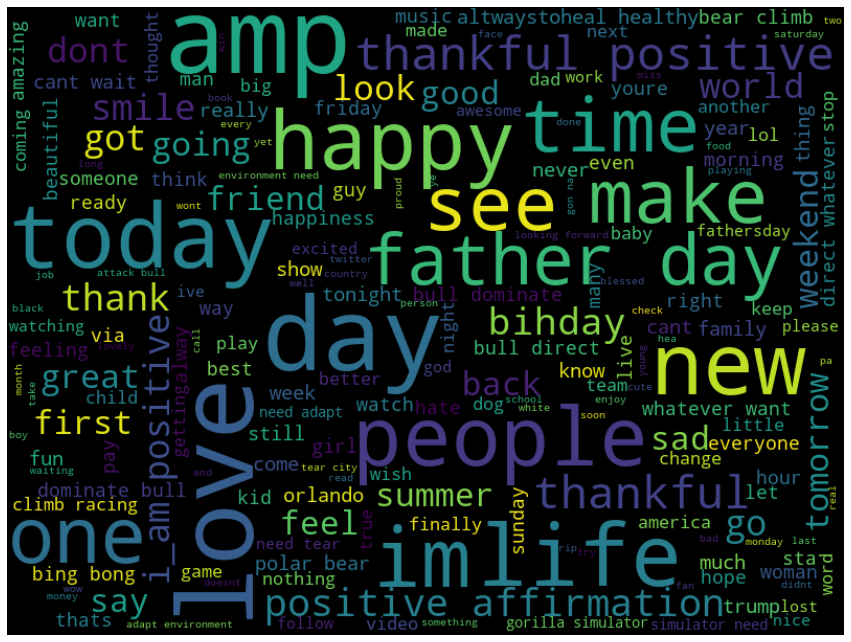

In [ ]:
all_words=' '.join([ i for i in data['tweet']])

cloud=WordCloud(width=800,height=600,random_state=23,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,18))
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

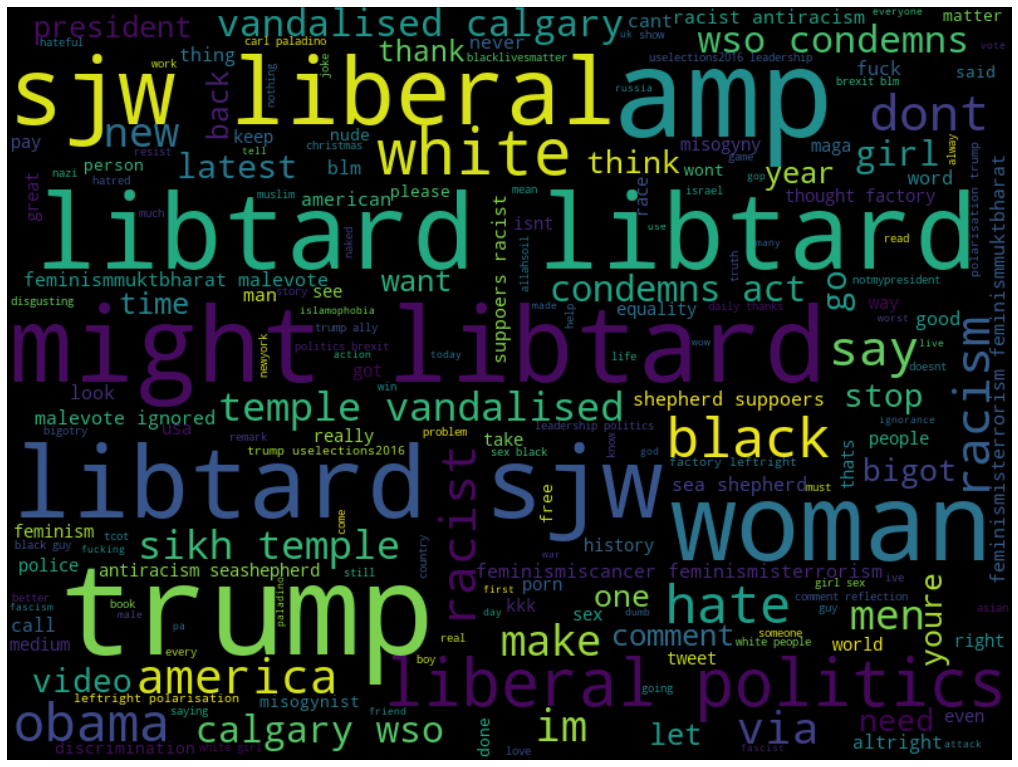

In [ ]:
# wordcloud for negative words
negative=' '.join([i for i in data['tweet'][data['label']==1]])

cloud=WordCloud(width=800,height=600,random_state=1,max_font_size=100).generate(negative)

plt.figure(figsize=(18,15))
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

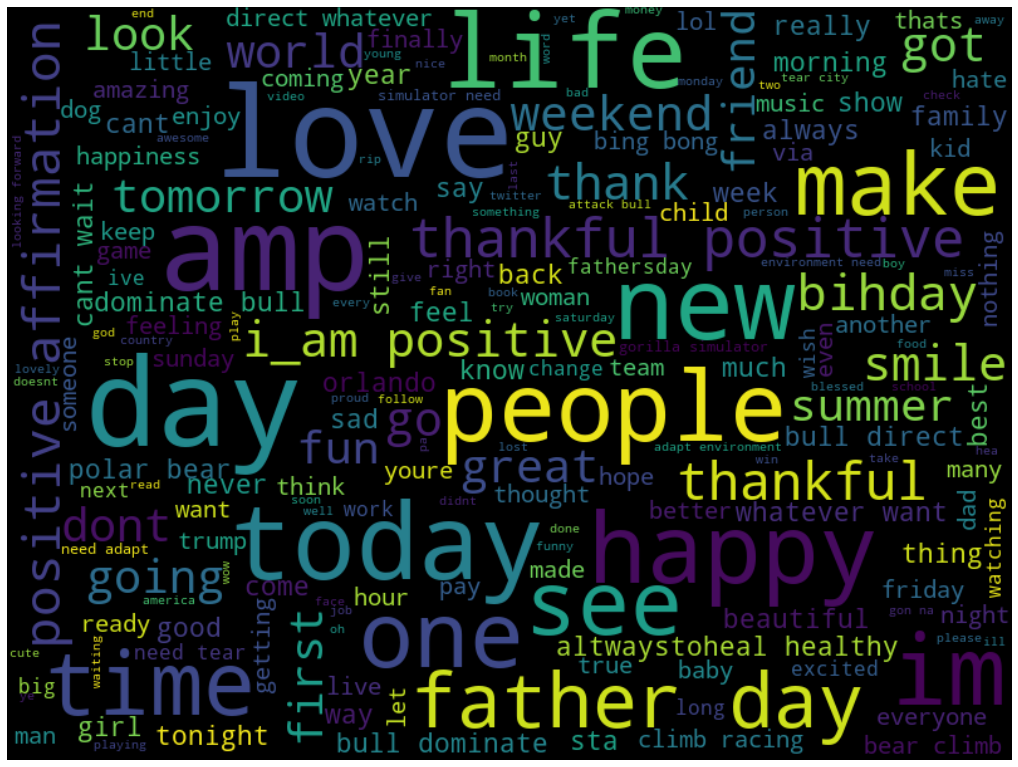

In [ ]:
positive=' '.join([i for i in data['tweet'][data['label']==0]])

cloud=WordCloud(width=800,height=600,random_state=1,max_font_size=100).generate(positive)

plt.figure(figsize=(18,15))
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

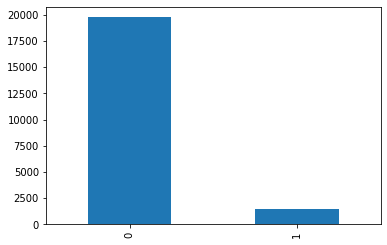

In [ ]:
values=pd.value_counts(data['label'],sort=True)
values.plot(kind='bar')

# **Preparing the model**

In [ ]:
data.drop('id',axis=1,inplace=True)
x=data.drop('label',axis=1)
y=data['label']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=1)

In [ ]:
cvect=CountVectorizer(stop_words='english')
xtrain=cvect.fit_transform(xtrain['tweet'])
xtest=cvect.transform(xtest['tweet'])

# Model Training

In [ ]:
pipe1=Pipeline([('logreg',LogisticRegression(solver='liblinear'))])
pipe2=Pipeline([('svm',SVC(C=0.1,kernel='linear'))])
pipe3=Pipeline([('navie_bays',MultinomialNB())])

pipe_list=[pipe1,pipe2,pipe3]
model=['logreg','svm','navie_bays']
score={}
for i in range(len(pipe_list)):
  pipe_list[i].fit(xtrain,ytrain)
  pred=pipe_list[i].predict(xtest)
  acc=accuracy_score(ytest,pred)
  score[model[i]]=acc


In [ ]:
score

{'logreg': 0.9644035832154644,
 'navie_bays': 0.9634606317774634,
 'svm': 0.9596888260254597}